In [2]:
import librosa
import numpy as np

# Load audio file
y, sr = librosa.load('example_original.wav')


In [3]:
print(y, sr)

[0. 0. 0. ... 0. 0. 0.] 22050


In [5]:
import soundfile as sf
# Compute harmonic-percussive source separation
y_harmonic, y_percussive = librosa.effects.hpss(y)
sf.write('example_harmonic.wav', y_harmonic, sr)
sf.write('example_percussive.wav', y_percussive, sr)


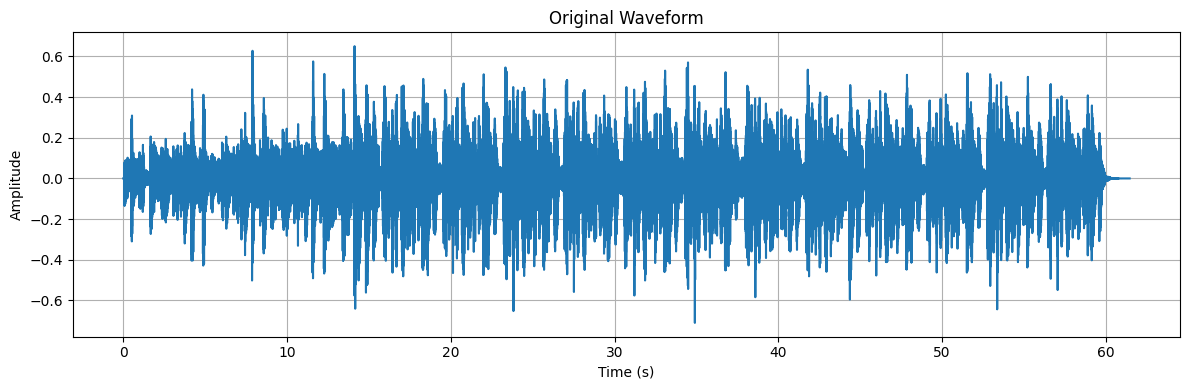

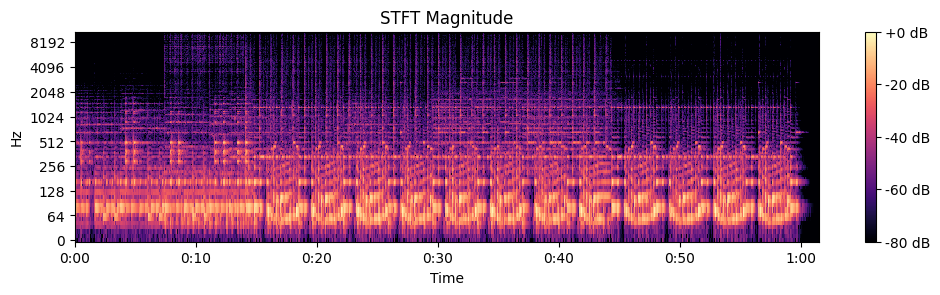

In [11]:
# Short time Fourier Transform
D = librosa.stft(y)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(y) / sr, len(y)), y)
plt.title('Original Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

y_inverse = librosa.istft(D)
plt.figure(figsize=(12, 6))

# Plot the magnitude spectrogram
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Magnitude')
plt.show()

C:\Users\Akshaj\AppData\Local\Temp\ipykernel_17804\3735842857.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_hz')


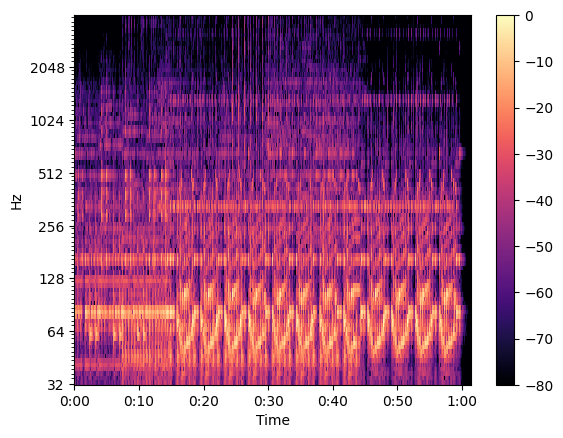

In [15]:
C = librosa.cqt(y, sr=sr)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_hz')
plt.colorbar()


C:\Users\Akshaj\AppData\Local\Temp\ipykernel_17804\2692904318.py:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note')


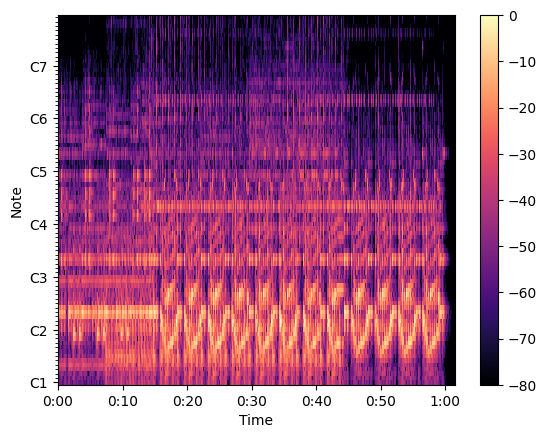

In [18]:
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar()

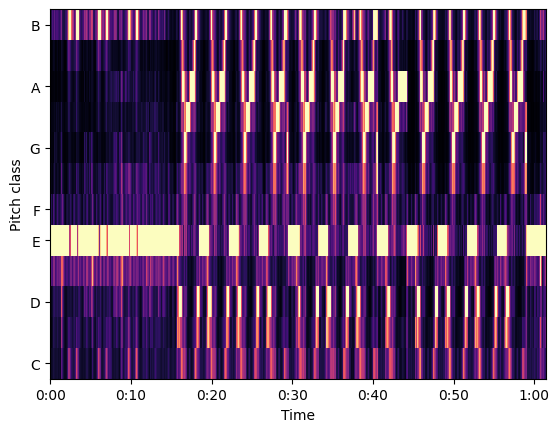

In [52]:
# CQT measures the energy in each pitch 
# chroma measures energy in each pitch class

chroma = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')

C:\Users\Akshaj\AppData\Local\Temp\ipykernel_17804\4155752385.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(chroma_c, y_axis='chroma', x_axis='time')


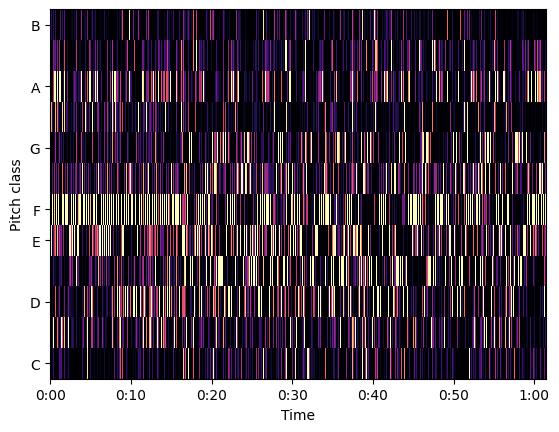

In [53]:
chroma_c = librosa.feature.chroma_cqt(C=C, sr=sr)
librosa.display.specshow(chroma_c, y_axis='chroma', x_axis='time')

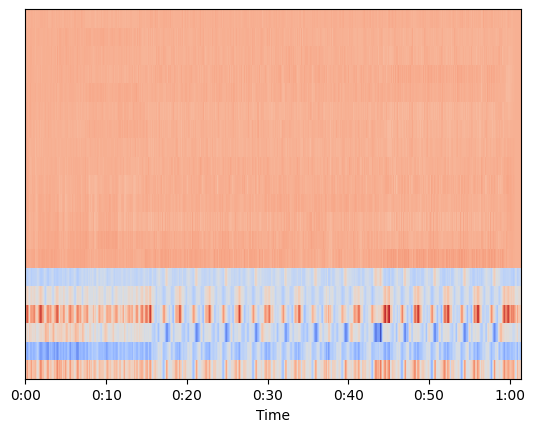

In [54]:
M = librosa.feature.melspectrogram(y=y, sr=sr)
#MFCC = librosa.feature.mfcc(S=librosa.power_to_db(M), n_mfcc=13)
MFCC = librosa.feature.mfcc(y=y, sr=sr)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
librosa.display.specshow(MFCC, x_axis='time')
librosa.display.specshow(tonnetz, x_axis='time')

(<Axes: xlabel='Time', ylabel='Tonnetz'>,
 <matplotlib.collections.QuadMesh at 0x15ae801acf0>)

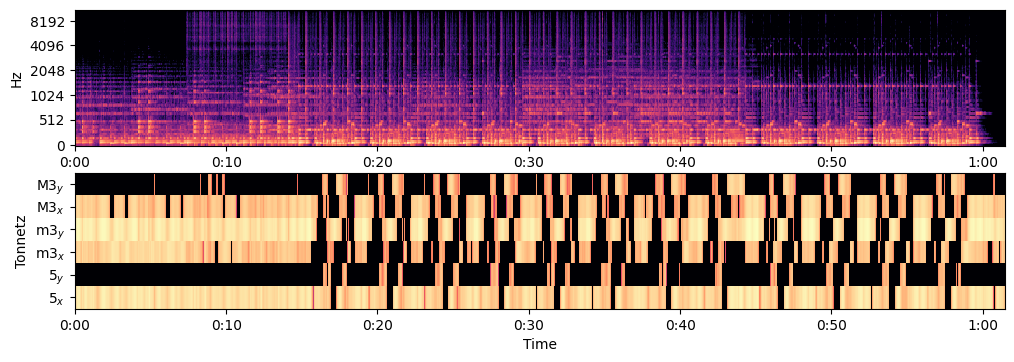

In [55]:
plt.figure(figsize=(12,6))
plt.subplot(3,1,1), librosa.display.specshow(librosa.power_to_db(M, ref=np.max), y_axis='mel', x_axis='time')
plt.subplot(3,1,2), librosa.display.specshow(librosa.power_to_db(tonnetz, ref=np.max), y_axis='tonnetz', x_axis='time')

In [57]:
# Compute STFT of harmonic component
#D = librosa.stft(y_harmonic)

# Compute harmonic pitch class profiles
#HPCP = librosa.feature.hpcp(y=y_harmonic, sr=sr)

# Print HPCP feature
#print(HPCP)

In [58]:
# ONSET AND BEATS
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
onsets = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
print(tempo)#, beats)

[129.19921875]


In [59]:
frames_per_second = chroma_c.shape[1] / (len(y) / sr)
num_frames = int(frames_per_second)

# Get the chroma values for the first second
chroma_first_second = chroma[:, :num_frames]

# Find pitch classes with strength of 0.75 or more
strong_pitches = []
for i, strength in enumerate(np.mean(chroma_first_second, axis=1)):
    if strength >= 0.75:
        strong_pitches.append((librosa.midi_to_note(i), strength))

strong_pitches

[('E-1', 1.0)]

In [60]:
def get_unique_strong_pitches_for_second(chroma, sr, y, n, threshold=0.90):
    # Calculate the number of frames per second
    frames_per_second = chroma.shape[1] / (len(y) / sr)
    num_frames = int(frames_per_second)
    
    # Calculate the start and end frame for the n-th second
    start_frame = int(n * frames_per_second)
    end_frame = start_frame + num_frames
    
    # Get the chroma values for the n-th second
    chroma_nth_second = chroma[:, start_frame:end_frame]
    
    # Find unique pitch classes with strength of 0.75 or more
    strong_pitches = set()
    for i in range(chroma_nth_second.shape[1]):  # iterate over frames
        for pitch_class, strength in enumerate(chroma_nth_second[:, i]):
            if strength >= threshold:
                strong_pitches.add((librosa.midi_to_note(pitch_class), strength))
    
    return list(strong_pitches)


# Example usage for the 1st second
n = 5
strong_pitches_nth_second = get_unique_strong_pitches_for_second(chroma, sr, y, n)
strong_pitches_nth_second

[('B-1', 0.9778282), ('E-1', 1.0)]